# Code Challenge
## A journey through the world of Data Science

- You have been provided with this notebook and a dataset of synthetic sales data.
- There are instructions through out the noteook
- Ensure to follow them and do what is required
- There will be extra credits for creativity and innovation in implimentation of the solutions
- Have fun and see the fun that lies in Data

In [15]:
## Install necessary libraries and any other you may need can be added here
%pip install pandas
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [16]:
## import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Import the dataset and run a few basic commands to understand its structure

In [17]:
## 1. Import the dataset
data = pd.read_csv('data1.csv')

In [18]:
## Display the first 10 rows of the dataset
data.head(10)

,id,item,price,date,time,quantity
0,1,Fresh Strawberries,3.99,9/6/2024,9:16 PM,27
1,2,Spaghetti Squash,3.99,11/11/2024,7:25 AM,26
2,3,Blue Denim Jeans,49.99,1/2/2024,4:03 PM,22
3,4,Raspberry Limeade,1.99,9/9/2024,6:38 AM,13
4,5,Wrist Support Brace,19.99,11/16/2024,3:42 PM,7
5,6,Folding Table,59.99,11/27/2024,8:36 PM,29
6,7,Pumpkin Spice Pancake Mix,3.49,7/21/2024,4:10 AM,30
7,8,Cheddar Cheese Crackers,2.29,1/25/2025,9:36 PM,14
8,9,Sliced Strawberries,4.99,6/30/2024,2:55 PM,10
9,10,Wine Glasses,29.99,1/21/2025,10:11 PM,12


In [19]:
## Display the data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1000 non-null   int64  
 1   item      1000 non-null   object 
 2   price     1000 non-null   float64
 3   date      1000 non-null   object 
 4   time      1000 non-null   object 
 5   quantity  1000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


## 2. 
- Create a new column 'TotalPrice' as the product of 'quantity' and 'price'
- Show the first 5 rows of the updated dataset

In [20]:
## 2.
data['TotalPrice'] = data['quantity'] * data['price']
data.head()

,id,item,price,date,time,quantity,TotalPrice
0,1,Fresh Strawberries,3.99,9/6/2024,9:16 PM,27,107.73
1,2,Spaghetti Squash,3.99,11/11/2024,7:25 AM,26,103.74
2,3,Blue Denim Jeans,49.99,1/2/2024,4:03 PM,22,1099.78
3,4,Raspberry Limeade,1.99,9/9/2024,6:38 AM,13,25.87
4,5,Wrist Support Brace,19.99,11/16/2024,3:42 PM,7,139.93


## 3.
- Group the data by the item and calculate the total quantity sold and the total revenue for each.
- Display the top 10 items by total revenue.

In [45]:
## 3. 
item_summary = data.groupby('item').agg(
    total_quantity=('quantity', 'sum'),
    total_revenue=('TotalPrice', 'sum')
).sort_values(by='total_revenue', ascending=False)
item_summary.head(10)

,total_quantity,total_revenue
item,,
Foldable Electric Scooter,45,15749.55
Inflatable Paddle Board,27,9449.73
Adjustable Pet Grooming Table,83,9129.17
Electric Pressure Washer,42,8399.58
Adjustable Dumbbells,28,6999.72
Robot Vacuum Cleaner,23,6899.77
Smart Air Purifier,29,5799.71
Electronic Drum Kit,16,5759.84
Digital Camera,18,5399.82


## 4.
- Create a new column named time_of_day. Use conditional logic to categorize the transactions based on the hour of the timestamp column:
    - Morning: 6:00 AM - 11:59 AM
    - Afternoon: 12:00 PM - 4:59 PM
    - Evening: 5:00 PM - 8:59 PM
    - Night: 9:00 PM - 5:59 AM

In [ ]:
## 4.
data['timestamp'] = pd.to_datetime(data['date'] + ' ' + data['time'])
def get_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
data['time_of_day'] = data['timestamp'].dt.hour.apply(get_time_of_day)
data.head()

/tmp/ipykernel_51757/1557142347.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['timestamp'] = pd.to_datetime(data['date'] + ' ' + data['time'])


,id,item,price,date,time,quantity,TotalPrice,timestamp,time_of_day
0,1,Fresh Strawberries,3.99,9/6/2024,9:16 PM,27,107.73,2024-09-06 21:16:00,Night
1,2,Spaghetti Squash,3.99,11/11/2024,7:25 AM,26,103.74,2024-11-11 07:25:00,Morning
2,3,Blue Denim Jeans,49.99,1/2/2024,4:03 PM,22,1099.78,2024-01-02 16:03:00,Afternoon
3,4,Raspberry Limeade,1.99,9/9/2024,6:38 AM,13,25.87,2024-09-09 06:38:00,Morning
4,5,Wrist Support Brace,19.99,11/16/2024,3:42 PM,7,139.93,2024-11-16 15:42:00,Afternoon


## 5.
- Group the data by the time_of_day category (from Step 4) and calculate the total revenue for each period.
- Create a simple bar chart to visualize these four revenue totals.

In [ ]:
## 5. 
revenue_by_time_of_day = data.groupby('time_of_day')['TotalPrice'].sum().reindex(['Morning', 'Afternoon', 'Evening', 'Night'])
revenue_by_time_of_day

time_of_day
Morning      116642.10
Afternoon     80429.00
Evening       66832.27
Night        165208.84
Name: TotalPrice, dtype: float64

In [ ]:
print(data[data["price"] == 0].shape[0])

0


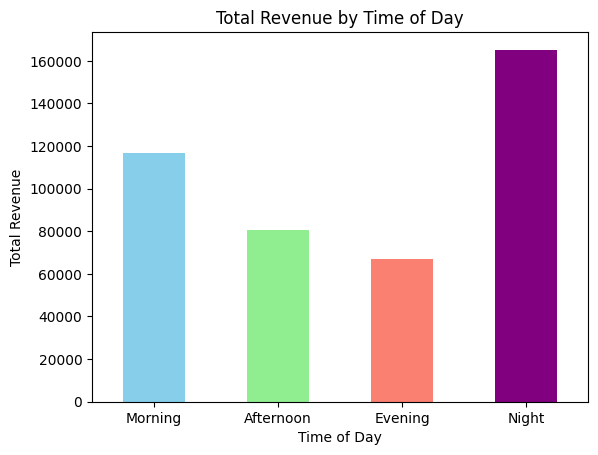

In [ ]:
## 5. Visualization
revenue_by_time_of_day.plot(kind='bar', title='Total Revenue by Time of Day', color=['skyblue', 'lightgreen', 'salmon', 'purple'])
plt.xlabel('Time of Day')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()

## 6. Total Price Distribution
- Create a histogram to show the Total Price Distribution and give a conclusion on what the graph shows

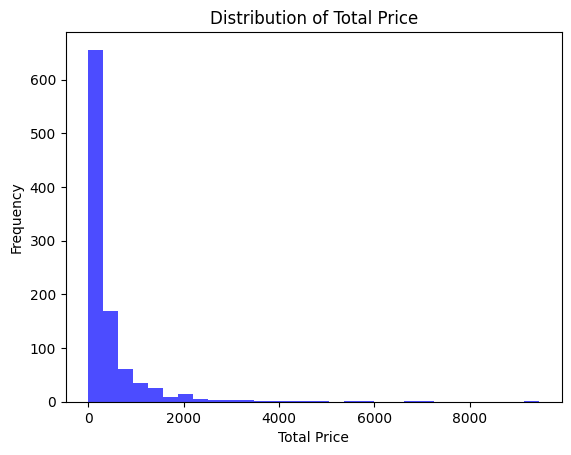

The histogram shows that the distribution of TotalPrice is right-skewed. 
Most transactions are of lower value, with a few transactions having a very high value.


In [ ]:
## 6. Distribution of the 'TotalPrice' column
plt.hist(data['TotalPrice'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Total Price')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()
print('''The histogram shows that the distribution of TotalPrice is right-skewed. 
Most transactions are of lower value, with a few transactions having a very high value.''')

## 7. Price tiers to Establish Type of Customer purchase
- Create a new column named price_tier based on the item's unit price:
    - Budget: $\leq \$5.00$
    - Mid-Range: $>\$5.00$ and $\leq \$20.00$
    - Premium: $>\$20.00$

In [37]:
## 7. 
def get_price_tier(price):
    if price <= 5.00:
        return 'Budget'
    elif 5.00 < price <= 20.00:
        return 'Mid-Range'
    else:
        return 'Premium'
data['price_tier'] = data['price'].apply(get_price_tier)
data.head()

,id,item,price,date,time,quantity,TotalPrice,timestamp,time_of_day,price_tier
0,1,Fresh Strawberries,3.99,2024-09-06,9:16 PM,27,107.73,2024-09-06 21:16:00,Night,Budget
1,2,Spaghetti Squash,3.99,2024-11-11,7:25 AM,26,103.74,2024-11-11 07:25:00,Morning,Budget
2,3,Blue Denim Jeans,49.99,2024-01-02,4:03 PM,22,1099.78,2024-01-02 16:03:00,Afternoon,Premium
3,4,Raspberry Limeade,1.99,2024-09-09,6:38 AM,13,25.87,2024-09-09 06:38:00,Morning,Budget
4,5,Wrist Support Brace,19.99,2024-11-16,3:42 PM,7,139.93,2024-11-16 15:42:00,Afternoon,Mid-Range


## 8. Total Sales Distribution
- Create a graph of distribution of total sales for each day of the month
- What insights do you glean from the graph that you have created?

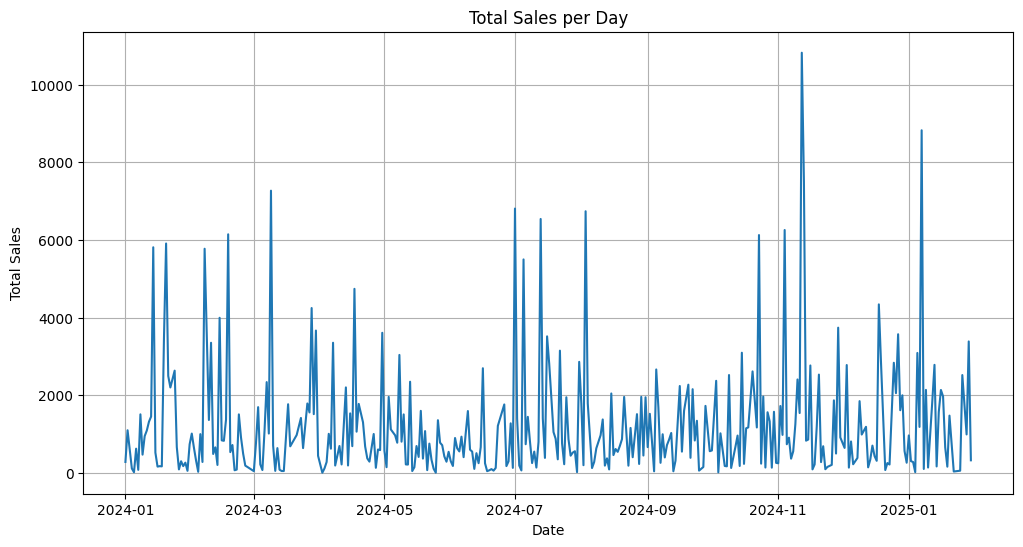

The graph shows fluctuations in sales throughout the month. 
There are noticeable peaks and troughs, which could be related to weekends, holidays, or other events.


In [38]:

# Group by date and calculate total sales for each day
data['date'] = data['timestamp'].dt.date
daily_sales = data.groupby('date')['TotalPrice'].sum()

# Plot the daily sales
daily_sales.plot(kind='line', figsize=(12, 6), title='Total Sales per Day')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()
print('''The graph shows fluctuations in sales throughout the month. 
There are noticeable peaks and troughs, which could be related to weekends, holidays, or other events.''')

## 9. Hypothetical Modeling - Discount Impact:

- Using the total revenue, Find the 10 least selling items.
- Save these 10 least selling items in a dataframe called least_selling_items
- Calculate the new total revenue for the whole dataset if a 10% discount was applied to all items in least_selling_items, assuming the quantity sold for each is increased by 20% due to the discount.

In [39]:
##9. Hypothetical Modeling - Discount Impact:
least_selling_items = item_summary.tail(10)
original_revenue = data['TotalPrice'].sum()
discounted_items = least_selling_items.index
new_data = data.copy()
for item in discounted_items:
    new_data.loc[new_data['item'] == item, 'price'] *= 0.9
    new_data.loc[new_data['item'] == item, 'quantity'] *= 1.2
new_data['TotalPrice'] = new_data['quantity'] * new_data['price']
new_revenue = new_data['TotalPrice'].sum()
print(f'Original Revenue: {original_revenue}')
print(f'New Revenue: {new_revenue}')
print(f'Revenue Increase: {new_revenue - original_revenue}')

Original Revenue: 429112.21
New Revenue: 429115.63800000004
Revenue Increase: 3.4280000000144355


/tmp/ipykernel_51757/3654240405.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.4]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_data.loc[new_data['item'] == item, 'quantity'] *= 1.2


## 10. A little Game
- You are going to find numbers through the work you have done and some you are yet to do.
- The finding of certain numbers... a Game of observations and A Game of dataset knowledge

In [40]:

## a number attached to the tail of every price
number1  = 9

## it is the opposite of omega
number2  = data['item'].nunique()

## the smaller number created by the most occuring numbers in a date the store made the highest sales
highest_sales_date = daily_sales.idxmax()
date_str = highest_sales_date.strftime('%Y%m%d')
from collections import Counter
most_common_digits = Counter(date_str).most_common(2)
number3 = int(''.join(sorted([d[0] for d in most_common_digits])))

## the trash is the treaure
number4 = data['item'].value_counts().idxmax()

## Using BODMAS:
## Beyond the of is your start point and cronologcally add symbols till you remove
## the number of letters in the most frequently bought item in the dataset
result  = ((number1 * number2) + number3) // len(number4)
print(f"number1: {number1}")
print(f"number2: {number2}")
print(f"number3: {number3}")
print(f"number4: {number4}")
print(f"result: {result}")
int(result)

number1: 9
number2: 775
number3: 12
number4: Patterned Knit Scarf
result: 349


349

In [43]:
## find the row at the index of the result
# index_row  = data.iloc[int(result)]
# index_row
# find the row at the index of the result
idx = int(result)
if 0 <= idx < len(data):
    index_row = data.iloc[idx]
    print(f"Row at index {idx}:")
    print(index_row.to_frame().T)
else:
    print(f"Result index {idx} is out of range for data (0..{len(data)-1})")

Row at index 349:
      id                 item  price        date     time quantity TotalPrice  \
349  350  Fitness Foam Roller  29.99  2024-11-16  9:33 AM        1      29.99   

               timestamp time_of_day price_tier  
349  2024-11-16 09:33:00     Morning    Premium  
